In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [2]:
train_mnist = torchvision.datasets.MNIST(root = ".", train = True, transform = transforms.ToTensor(),download = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 272967705.63it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 20997693.50it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 117669231.24it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6524153.69it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [3]:
test_mnist = torchvision.datasets.MNIST(root =".", train = False, transform=transforms.ToTensor(), download = True)

In [4]:
train_mnist.data.shape, test_mnist.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [5]:
train_mnist.targets.shape,test_mnist.targets.shape

(torch.Size([60000]), torch.Size([10000]))

In [6]:
#data loader

batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset = train_mnist, batch_size = batch_size, shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_mnist, batch_size= batch_size, shuffle = False)




In [18]:
#model

class LSTM(nn.Module):
  def __init__(self, inputs, hidden, layers, outputs):
    super(LSTM,self).__init__()

    self.D = inputs
    self.K = outputs
    self.M = hidden
    self.L = layers


    self.lstm = nn.LSTM(input_size = self.D, hidden_size = self.M, num_layers = self.L, batch_first = True)

    self.fc = nn.Linear(self.M, self.K)

  def forward(self,x):

    h_0 = torch.zeros(self.L, x.size(0), self.M).to(device)
    c_0 = torch.zeros(self.L, x.size(0), self.M).to(device)

    out, _ = self.lstm(x,(h_0,c_0))

    out = self.fc(out[:,-1,:])

    return out





In [19]:
model = LSTM(28,128,2,10)

In [20]:
device = torch.device("cuda:0")
print(device)
model.to(device)

cuda:0


LSTM(
  (lstm): LSTM(28, 10, num_layers=2, batch_first=True)
  (fc): Linear(in_features=10, out_features=10, bias=True)
)

In [21]:
#optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [32]:
#training

epochs = 10
train_loss = np.zeros(epochs)
test_loss = np.zeros(epochs)

for i in range(epochs):


  train_losses = []
  for inputs,targets in train_loader:


    optimizer.zero_grad()

    inputs, targets = inputs.to(device), targets.to(device)

    inputs = inputs.view(-1,28,28)

    outputs = model(inputs)

    loss_train = criterion(outputs,targets)


    loss_train.backward()

    optimizer.step()

    train_losses.append(loss_train.item())

  loss_train = np.mean(train_losses)

  train_loss[i] = loss_train


  test_losses = []
  for inputs,targets in test_loader:


    inputs, targets = inputs.to(device), targets.to(device)

    inputs = inputs.view(-1,28,28)

    outputs = model(inputs)

    loss_test = criterion(outputs,targets)
    test_losses.append(loss_test.item())


  loss_test = np.mean(test_losses)
  test_loss[i] = loss_test

  print(f" epoch -- {i+1}/{epochs},  training loss -- {loss_train},    test loss -- {loss_test}")




 epoch -- 1/10,  training loss -- 1.7796157659498104,    test loss -- 1.2694721410546121
 epoch -- 2/10,  training loss -- 1.0449230885709018,    test loss -- 0.8507681839828249
 epoch -- 3/10,  training loss -- 0.7774116818838791,    test loss -- 0.6740254069430919
 epoch -- 4/10,  training loss -- 0.6463624176694386,    test loss -- 0.5870277061115338
 epoch -- 5/10,  training loss -- 0.5605303679447947,    test loss -- 0.5057943883953215
 epoch -- 6/10,  training loss -- 0.4914206021121824,    test loss -- 0.44171327427972723
 epoch -- 7/10,  training loss -- 0.43136930869205165,    test loss -- 0.39410904738344726
 epoch -- 8/10,  training loss -- 0.39335692198927213,    test loss -- 0.3670861245710639
 epoch -- 9/10,  training loss -- 0.3629334963270342,    test loss -- 0.337514324844638
 epoch -- 10/10,  training loss -- 0.3390373253047085,    test loss -- 0.3224889417709429


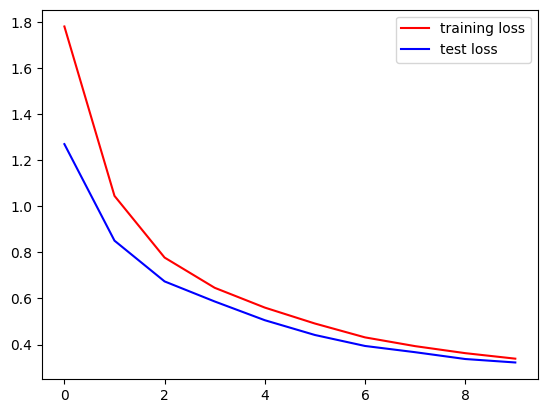

In [33]:
plt.plot(train_loss,label = "training loss", c = "r")
plt.plot(test_loss,label = "test loss", c = "b")
plt.legend()
plt.show()